In [1]:
import os
import sys
import glob


import torch
from torchvision.transforms import Compose, Resize, ToTensor, PILToTensor, ConvertImageDtype

NB_DIR = os.getcwd()
ROOT_DIR = os.path.dirname(NB_DIR)
sys.path.append(ROOT_DIR)

from core.trainer import BinaryClassifierTrainer
from experiments.st.datasets import STDataSet  
from experiments.st.data_model import STImages
from experiments.st._paths import DataPaths

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
import mlflow
# model = torch.load(os.path.join(ROOT_DIR, "data", "model.pth"), map_location=torch.device(DEVICE))
# model = mlflow.pytorch.load_model("file:///home/oem/repositories/mlflow_artifact/3/70d34166b6f9422da3ea301aee89e6d1/artifacts/model")
model = mlflow.pytorch.load_model("file:///home/oem/repositories/mlflow_artifact/3/cabcd6e6865148f59464bfb408f53b24/artifacts/model")


2024/02/25 18:04:34 WARNING mlflow.pytorch: Stored model version '2.2.0+cu121' does not match installed PyTorch version '2.0.1+cu117'


### GE dataset

In [3]:
trainer = BinaryClassifierTrainer(model, loss=torch.nn.functional.binary_cross_entropy_with_logits)
data_paths = DataPaths(os.path.join(ROOT_DIR, "data"))
st_images = STImages(
    s_image_paths=glob.glob(str(data_paths.ge.s / "*")),
    t_image_paths=glob.glob(str(data_paths.ge.t / "*")),
)
transform = Compose(
        [PILToTensor(), Resize((512, 512)), ConvertImageDtype(torch.float)]
    )
st_dataset = STDataSet(
    st_images.image_paths,
    st_images.labels,
    transform,
    device=DEVICE,
)
ge_loss, ge_metris = trainer.run_epoch(
    phase="test", 
    epoch=1, 
    dataloader=torch.utils.data.DataLoader(
        st_dataset,
        batch_size=1,
        shuffle=False,
    ),
)

/home/oem/anaconda3/envs/breast/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
 |##############################  | test | EPOCH 1: [1844/1957] | eta:4 | total_loss: 0.02426 | accuracy: 0.98645 | auroc: 0.97939 | prauc: 0.01282/home/oem/anaconda3/envs/breast/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: Th

 |##############################  | test | EPOCH 1: [1853/1957] | eta:5 | total_loss: 0.03193 | accuracy: 0.98382 | auroc: 0.97766 | prauc: 0.13076/home/oem/anaconda3/envs/breast/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
 |##############################  | test | EPOCH 1: [1854/1957] | eta:5 | total_loss: 0.03235 | accuracy: 0.98329 | au

 |##############################  | test | EPOCH 1: [1863/1957] | eta:4 | total_loss: 0.03868 | accuracy: 0.98122 | auroc: 0.98045 | prauc: 0.24192/home/oem/anaconda3/envs/breast/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
 |##############################  | test | EPOCH 1: [1864/1957] | eta:4 | total_loss: 0.03949 | accuracy: 0.9807 | aur

 |##############################  | test | EPOCH 1: [1873/1957] | eta:5 | total_loss: 0.04529 | accuracy: 0.97759 | auroc: 0.98127 | prauc: 0.32468/home/oem/anaconda3/envs/breast/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
 |##############################  | test | EPOCH 1: [1874/1957] | eta:5 | total_loss: 0.04528 | accuracy: 0.9776 | aur

 |##############################  | test | EPOCH 1: [1883/1957] | eta:4 | total_loss: 0.04724 | accuracy: 0.97718 | auroc: 0.98421 | prauc: 0.48355/home/oem/anaconda3/envs/breast/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
 |##############################  | test | EPOCH 1: [1884/1957] | eta:4 | total_loss: 0.0488 | accuracy: 0.97666 | aur

 |##############################  | test | EPOCH 1: [1893/1957] | eta:4 | total_loss: 0.05072 | accuracy: 0.97624 | auroc: 0.98527 | prauc: 0.57238/home/oem/anaconda3/envs/breast/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
 |##############################  | test | EPOCH 1: [1894/1957] | eta:4 | total_loss: 0.05094 | accuracy: 0.97625 | au

 |############################### | test | EPOCH 1: [1903/1957] | eta:3 | total_loss: 0.05911 | accuracy: 0.97479 | auroc: 0.98415 | prauc: 0.61541/home/oem/anaconda3/envs/breast/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
 |############################### | test | EPOCH 1: [1904/1957] | eta:3 | total_loss: 0.05917 | accuracy: 0.9748 | aur

 |############################### | test | EPOCH 1: [1913/1957] | eta:3 | total_loss: 0.06478 | accuracy: 0.97335 | auroc: 0.98442 | prauc: 0.66258/home/oem/anaconda3/envs/breast/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
 |############################### | test | EPOCH 1: [1914/1957] | eta:3 | total_loss: 0.06495 | accuracy: 0.97337 | au

 |############################### | test | EPOCH 1: [1923/1957] | eta:2 | total_loss: 0.07031 | accuracy: 0.97141 | auroc: 0.98429 | prauc: 0.68203/home/oem/anaconda3/envs/breast/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
 |############################### | test | EPOCH 1: [1924/1957] | eta:2 | total_loss: 0.0706 | accuracy: 0.97143 | aur

 |############################### | test | EPOCH 1: [1933/1957] | eta:2 | total_loss: 0.07178 | accuracy: 0.97104 | auroc: 0.98521 | prauc: 0.71322/home/oem/anaconda3/envs/breast/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
 |############################### | test | EPOCH 1: [1934/1957] | eta:2 | total_loss: 0.07188 | accuracy: 0.97106 | au

 |############################### | test | EPOCH 1: [1943/1957] | eta:1 | total_loss: 0.07662 | accuracy: 0.96914 | auroc: 0.98528 | prauc: 0.72899/home/oem/anaconda3/envs/breast/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
 |############################### | test | EPOCH 1: [1944/1957] | eta:1 | total_loss: 0.07666 | accuracy: 0.96915 | au

 |############################### | test | EPOCH 1: [1953/1957] | eta:1 | total_loss: 0.08164 | accuracy: 0.96622 | auroc: 0.98525 | prauc: 0.74016/home/oem/anaconda3/envs/breast/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
 |############################### | test | EPOCH 1: [1954/1957] | eta:1 | total_loss: 0.08164 | accuracy: 0.96624 | au

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Receiver Operating Characteristic (PRAUC)'}, xlabel='Recall', ylabel='Precision'>)

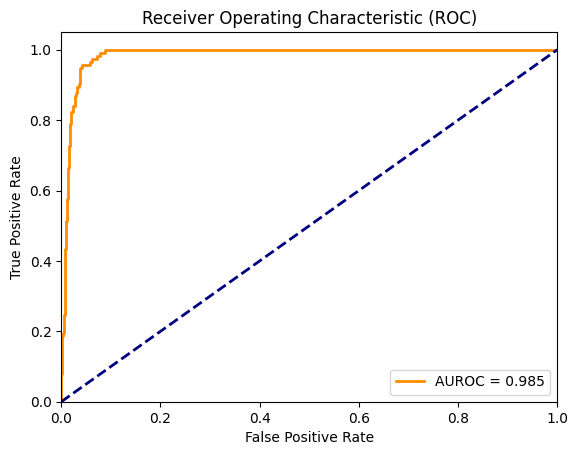

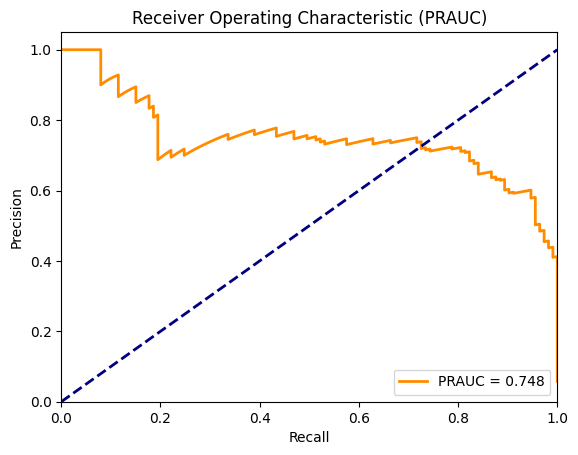

In [4]:
from core.metics import plot_auroc, plot_prauc

plot_auroc(ge_metris.labels, ge_metris.probs)
plot_prauc(ge_metris.labels, ge_metris.probs)